In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
#Combine all years of data into one dataFrame
df_2023 = pd.read_csv("GatherDataFiles/df_2023.csv")
df_2022 = pd.read_csv("GatherDataFiles/df_2022.csv")
df_2021 = pd.read_csv("GatherDataFiles/df_2021.csv")
df_2019 = pd.read_csv("GatherDataFiles/df_2019.csv")
df_2018 = pd.read_csv("GatherDataFiles/df_2018.csv")
df_2017 = pd.read_csv("GatherDataFiles/df_2017.csv")
df_2016 = pd.read_csv("GatherDataFiles/df_2016.csv")
df_2015 = pd.read_csv("GatherDataFiles/df_2015.csv")
df_2014 = pd.read_csv("GatherDataFiles/df_2014.csv")

df_allYears = pd.concat([df_2023, df_2022, df_2021, df_2019, df_2018, df_2017, df_2016, df_2015, df_2014])
df_allYears = df_allYears.drop("Unnamed: 0", axis=1)
df_allYears

,team_name,year,tournament_success,simple_rating_system,strength_of_schedule,pace_factor,offensive_rating,free_throw_attempt_rate,three_point_attempt_rate,true_shooting_percentage,total_rebound_percentage,assist_percentage,steal_percentage,block_percentage,effective_field_goal_percentage,turnover_percentage,offensive_rebound_percentage
0,Alabama,2023,2,23.18,9.64,72.6,110.4,0.366,0.472,0.557,54.4,54.3,8.2,11.3,0.521,15.9,34.2
1,Texas A&M-Corpus Christi,2023,0,-2.58,-7.03,71.7,110.9,0.348,0.342,0.559,52.6,55.2,11.7,5.3,0.513,15.2,33.7
2,Maryland,2023,1,14.59,8.36,64.5,107.7,0.343,0.369,0.545,51.1,46.2,8.4,10.1,0.508,14.3,30.0
3,West Virginia,2023,0,15.94,10.88,69.6,108.8,0.394,0.363,0.557,52.0,50.1,9.6,8.6,0.515,16.0,34.0
4,Virginia,2023,0,13.28,5.98,62.5,108.1,0.347,0.356,0.544,50.2,65.4,10.9,13.8,0.512,12.1,25.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,Brigham Young,2014,0,11.63,5.72,73.5,111.9,0.483,0.228,0.545,53.3,53.8,9.6,7.3,0.503,12.8,34.7
60,Creighton,2014,1,18.03,7.17,65.3,120.6,0.339,0.446,0.616,51.7,64.2,6.1,3.8,0.589,13.3,27.7
61,Louisiana,2014,0,2.91,-0.28,71.2,111.4,0.429,0.315,0.554,52.3,47.8,9.8,10.2,0.522,15.2,36.3
62,Baylor,2014,2,15.80,10.11,64.2,115.1,0.450,0.344,0.556,54.8,58.7,8.0,14.0,0.521,14.7,40.6


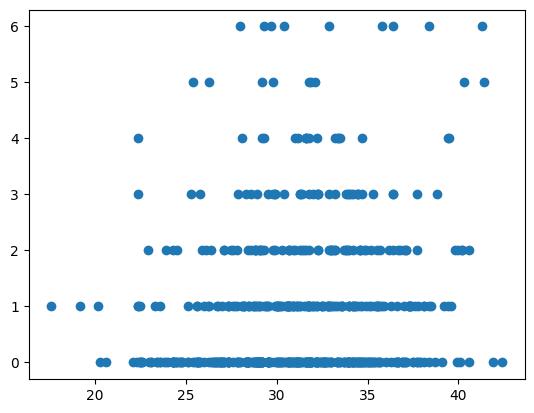

In [5]:
#Cluster with Tournament_sucess and offensive_rebound_percentage
x_values = df_allYears['offensive_rebound_percentage'].tolist()
y_values = df_allYears['tournament_success'].tolist()
plt.scatter(x_values, y_values)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to '

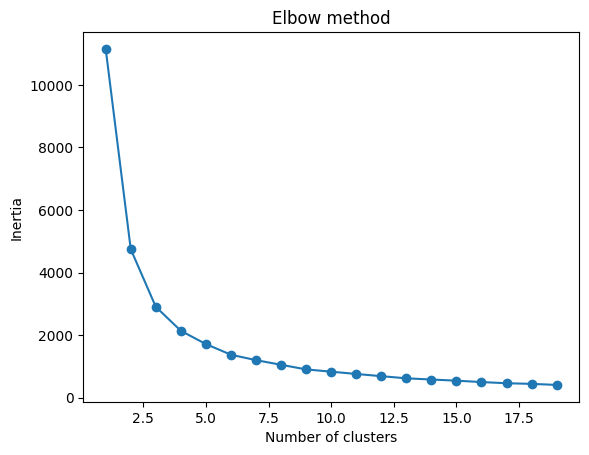

In [9]:
data = list(zip(x_values, y_values))
inertias = []

for i in range(1,20):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,20), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


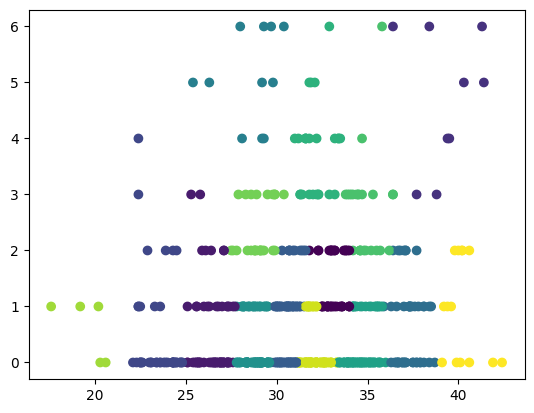

In [8]:
kmeans = KMeans(n_clusters=15)
kmeans.fit(data)

plt.scatter(x_values, y_values, c=kmeans.labels_)
plt.show()

In [11]:
#I realized that clustering was not the best model for my data because the team's success was only measured from 0-6
#MultiClass Logistic Regression:
# I picked what I thought would be the top 7 best indicators (independent variables) of team's success

X = df_allYears[['pace_factor', 'three_point_attempt_rate', 'true_shooting_percentage', 'total_rebound_percentage', 'assist_percentage', 'turnover_percentage', 'offensive_rebound_percentage']].values
y = df_allYears['tournament_success'].values
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(multi_class='multinomial')
logreg = LogisticRegression().fit(X_train, y_train)



# Predict the target variable for the test set
y_pred = logreg.predict(X_test)

# Evaluate the performance of the model
print('Accuracy:', accuracy_score(y_test, y_pred))
#print('Confusion matrix:\n', confusion_matrix(y_test, y_pred))
#print('Classification report:\n', classification_report(y_test, y_pred))

# Get the coefficients of the logistic regression model
#coefficients = pd.DataFrame(logreg.coef_, columns=X.columns)
pd.DataFrame(np.hstack((logreg.coef_, logreg.classes_.reshape(-1, 1))), columns=df_allYears[['pace_factor', 'three_point_attempt_rate', 'true_shooting_percentage', 'total_rebound_percentage', 'assist_percentage', 'turnover_percentage', 'offensive_rebound_percentage']].columns.tolist() + ["Type"])



Accuracy: 0.3706896551724138


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,pace_factor,three_point_attempt_rate,true_shooting_percentage,total_rebound_percentage,assist_percentage,turnover_percentage,offensive_rebound_percentage,Type
0,0.042289,0.004346,-0.012437,-0.072246,-0.019666,0.423955,-0.070092,0.0
1,0.024683,0.005464,0.001525,-0.084082,0.046590,0.096470,0.003641,1.0
2,-0.015709,-0.003572,0.000438,0.017011,0.030945,-0.078934,0.009925,2.0
3,0.103832,-0.014681,0.001061,-0.100067,-0.033580,-0.065094,0.024764,3.0
4,-0.088557,0.008209,0.003453,0.069023,0.042207,-0.030950,-0.007176,4.0
5,-0.028147,-0.003057,0.002935,0.229675,-0.112675,-0.222743,-0.074187,5.0
6,-0.038392,0.003291,0.003026,-0.059312,0.046178,-0.122704,0.113125,6.0


- After using a multiclass logistic regression model, I was able to conclude that teams who would perform better in the NCAA tournament have an higher offensive rebound percentage as well as a lower turnover percentage.

- Since there is a positive correlation of .123 for Type 6 which is a higher correlation than the rest of the variables, I was able to conclude that when picking a team to win the national championship you should look for teams that aquire high percentage of offensive rebounds.

- Another Indicator would be that teams with a lower turnover percentage would have a better chance of making it far in the tournament because of the strong negative coefficient of -.113 for type 5. 

- When making your NCAA march maddness bracket for next year, you should make sure to pick teams with a high offensive rebounding percentage and low turnover percentage to go far in the tournament. This will give you the best chance to win your pool and beat your friends!